# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

### Display Data Structure
- `X.info()`:  
  Shows the structure of the dataset, including the number of entries, column names, data types, and the number of non-null values for each column.

### Summary Statistics for Numerical Columns
- `X.describe()`:  
  Provides descriptive statistics (like mean, standard deviation, minimum, maximum, and quartiles) for all numerical features in the dataset.

In [4]:
# Data structure
X.info()

# Numerical columns
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000


### Checking for Missing Values

- Check for missing values in each column:
  - `X.isnull().sum()`: Calculates the total number of missing (null) entries per column.
- Filter and display only the columns that have missing values:
  - Columns with at least one missing value are selected and printed.

In [5]:
# Missing values per column
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


**There are no missing values in the data**

### Analyzing Review Text Length

- Create a new feature `review_length`:
  - Calculate the number of words in each review by splitting the review text and counting the words.
- Display statistical summaries of the `review_length` feature:
  - Use `.describe()` to show metrics like mean, min, max, and percentiles.
- Visualize the distribution of review lengths:
  - A histogram with a kernel density estimate (KDE) is plotted using Seaborn.
  - The x-axis shows the number of words in a review, and the y-axis shows the number of reviews.
  - This helps to understand how review lengths are distributed across the dataset.

count    18442.000000
mean        62.449355
std         28.138528
min          2.000000
25%         39.000000
50%         62.000000
75%         90.000000
max        115.000000
Name: review_length, dtype: float64


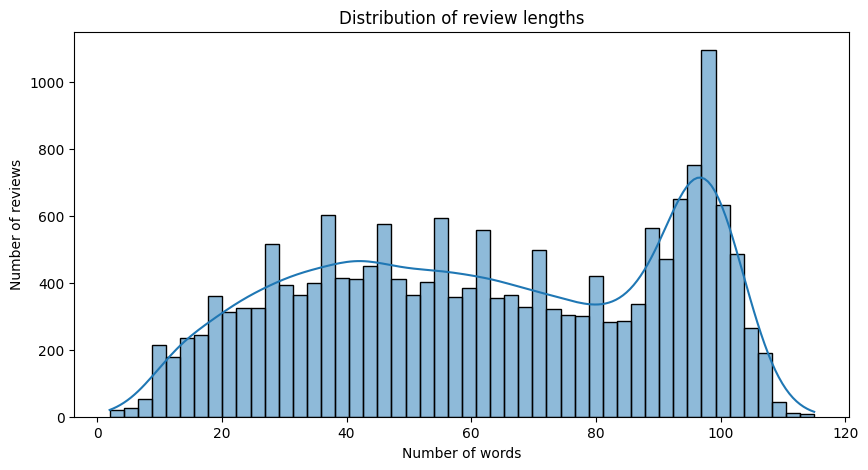

In [6]:
# Length of review texts
X["review_length"] = X["Review Text"].astype(str).apply(lambda x: len(x.split()))

# Statistical values
print(X["review_length"].describe())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(X["review_length"], bins=50, kde=True)
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.title("Distribution of review lengths")
plt.show()

#### Results

The histogram shows the distribution of review lengths based on the number of words in each review.

- The **x-axis** represents the number of words per review.
- The **y-axis** shows the number of reviews falling into each word count range.
- Most reviews fall between **20 and 100 words**, with a noticeable peak around **100 words**.
- The smooth blue curve represents a **kernel density estimate (KDE)**, giving an idea of the overall shape of the distribution.

This plot helps us understand the typical length of reviews and may inform preprocessing decisions, such as truncation or padding for text models.

### Label Distribution Visualization

This code creates a bar chart to visualize the distribution of the target labels.

- **`sns.countplot(x=y)`**: Creates a count plot showing how many samples belong to each class (0 = not recommended, 1 = recommended).
- **`plt.xlabel()` / `plt.ylabel()`**: Label the axes for better readability.
- **`plt.title()`**: Adds a descriptive title to the plot.

The resulting plot helps to identify if the dataset is **imbalanced**, which can influence model performance and guide the choice of evaluation metrics or sampling strategies.

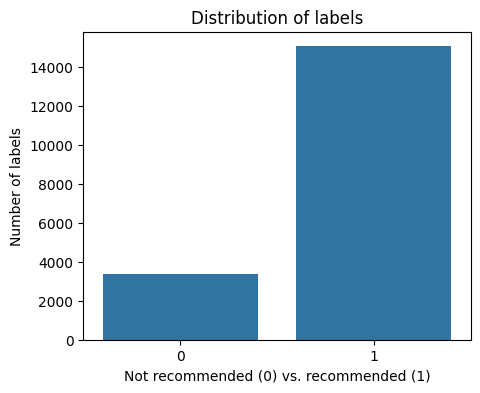

In [7]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.xlabel("Not recommended (0) vs. recommended (1)")
plt.ylabel("Number of labels")
plt.title("Distribution of labels")
plt.show()

#### Results

The bar chart shows the distribution of the review labels in the dataset:

- **Label 0**: Reviews where the product was **not recommended**.
- **Label 1**: Reviews where the product was **recommended**.

From the chart, we can observe that:

- The majority of reviews recommend the product (Label 1).
- There is a significant **class imbalance**, with far fewer reviews labeled as not recommended (Label 0).

This imbalance should be considered when training models, as it might bias predictions toward the majority class.

### Top 20 Most Common Words in Reviews

This code analyzes the most frequent words used in the review texts:

- **Text Processing**:
  - All review texts are concatenated into a single string and converted to lowercase.
  - Using regular expressions, only words with **at least 3 letters** are extracted to remove very short and less meaningful tokens.

- **Word Frequency**:
  - The `Counter` class is used to count how often each word appears.
  - The top 20 most common words are selected.

- **Visualization**:
  - A bar plot displays the 20 most frequent words along with their frequency counts.
  - The x-axis shows the words, and the y-axis shows how often they occur in the dataset.

This analysis helps identify common themes or repetitive vocabulary in the reviews.


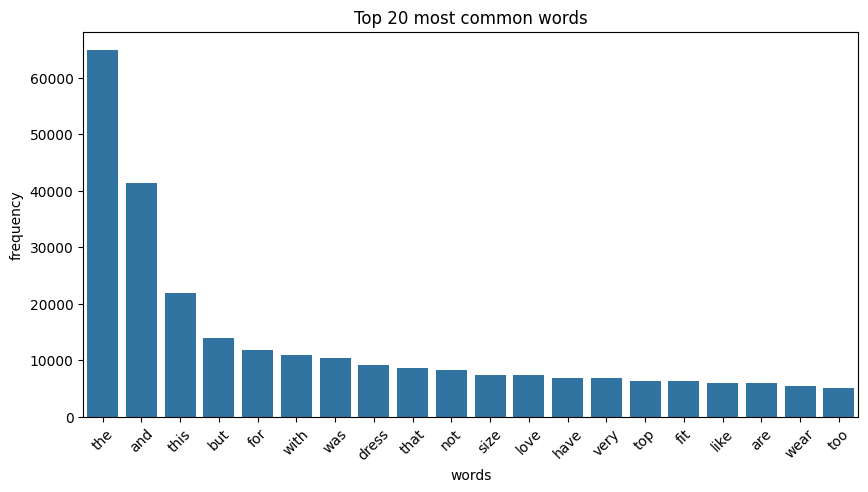

In [8]:
from collections import Counter
import re

# List of words
words = " ".join(X["Review Text"].dropna()).lower()
words = re.findall(r'\b[a-zA-Z]{3,}\b', words)  # only words with at least 3 letters

# Most common words
word_freq = Counter(words).most_common(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
plt.xticks(rotation=45)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Top 20 most common words")
plt.show()

#### Results

Most of the words in this analysis are stopwords, which don't provide meaningful insights.

### Top 20 Most Common Words in Reviews (Excluding Stopwords)

This code analyzes the most common words found in customer review texts, while excluding common English stopwords such as *"the"*, *"and"*, and *"was"*. Removing stopwords helps to focus on the meaningful and content-rich words in the text, which are more relevant for insights and NLP tasks.

#### What the Code Does

1. **Combines all review texts** into one lowercase string.
2. **Extracts all words** with at least 3 letters using regular expressions.
3. **Removes stopwords** using the `nltk` stopword list to eliminate high-frequency but semantically weak words.
4. **Counts the most frequent words** using `Counter` from the `collections` module.
5. **Visualizes the results** using a bar chart (via `seaborn` and `matplotlib`) showing the top 20 most common non-stopwords.

This helps highlight which words appear most frequently in the reviews, making it easier to understand common themes or concerns without the noise of generic language.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


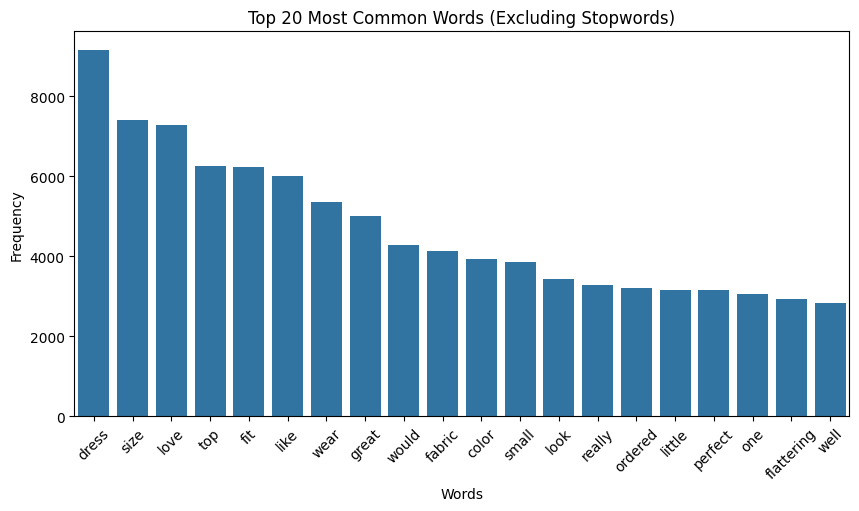

In [9]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords if not already done
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string, convert to lowercase
words = " ".join(X["Review Text"].dropna()).lower()

# Extract words with at least 3 letters
words = re.findall(r'\b[a-zA-Z]{3,}\b', words)

# Filter out stopwords
filtered_words = [word for word in words if word not in stop_words]

# Most common words
word_freq = Counter(filtered_words).most_common(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words (Excluding Stopwords)")
plt.show()

## Building Pipeline

This code builds a preprocessing pipeline that transforms different types of features in preparation for machine learning. It uses `scikit-learn`'s `Pipeline` and `ColumnTransformer` to streamline the preprocessing steps.

### Feature Types

- **Numerical Features:** `["Age", "Positive Feedback Count"]`
  - These features are scaled using `StandardScaler` to normalize the data.
  
- **Categorical Features:** `["Division Name", "Department Name", "Class Name"]`
  - These are encoded using `OneHotEncoder`, which converts each category into a binary vector. Unknown categories during inference are ignored.

- **Text Features:** `["Review Text"]`
  - This feature is vectorized using `TfidfVectorizer` to convert the text into a matrix of TF-IDF features.
  - English stopwords are removed, and the number of features is limited to 5000 for efficiency.

### Pipeline Steps

1. **ColumnTransformer** applies the appropriate transformations to each group of features.
2. A `Pipeline` wraps the transformer for easier integration into model training.
3. The pipeline is fit on the training data (`X_train`) and then used to transform both training and test data.

### Output

The final transformed feature matrix is printed to show the new shape, confirming that all features have been encoded into a numerical format suitable for machine learning models.


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define numerical, categorical, and text features
num_features = ["Age", "Positive Feedback Count"]
cat_features = ["Division Name", "Department Name", "Class Name"]
text_features = ["Review Text"]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("text", TfidfVectorizer(stop_words="english", max_features=5000), "Review Text"),
    ]
)

# Define full pipeline including classifier
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=27))
])

## Training Pipeline

In this step, the full pipeline (including preprocessing and classifier) is trained on the training data. This means that all preprocessing steps (scaling, encoding, text vectorization) are applied inside the pipeline, and the model is fitted in a single process. 

After training, the pipeline is used to make predictions on the test set. The accuracy score and a detailed classification report are printed to evaluate the model’s performance. This approach ensures consistent preprocessing during both training and inference.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Train full pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8802
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       327
           1       0.90      0.96      0.93      1518

    accuracy                           0.88      1845
   macro avg       0.82      0.73      0.76      1845
weighted avg       0.87      0.88      0.87      1845



### 📊 Model Evaluation Results

The model achieved an overall **accuracy of 88.02%** on the test set.

#### Class-wise performance:
- **Class 0** (e.g., negative or neutral reviews):
  - Precision: 0.74 → Of all predicted class 0, 74% were correct.
  - Recall: 0.50 → Only 50% of actual class 0 instances were correctly identified.
  - F1-Score: 0.60 → Indicates room for improvement in identifying this class.

- **Class 1** (e.g., positive reviews):
  - Precision: 0.90 → Very few false positives.
  - Recall: 0.96 → Most actual positives were correctly identified.
  - F1-Score: 0.93 → Excellent performance.

#### Averages:
- **Macro Average** (unweighted mean across classes): F1-score of 0.76 → reveals moderate performance when treating both classes equally.
- **Weighted Average** (accounts for class imbalance): F1-score of 0.87 → the model performs well overall, especially considering class 1 is dominant.

📝 **Conclusion**: The classifier performs very well on the dominant class (1), but has more difficulty correctly identifying the minority class (0), suggesting potential benefits from handling class imbalance more explicitly.


## Fine-Tuning Pipeline

### Model Comparison Using Pipelines

In this section, we compare multiple classification models using **scikit-learn pipelines** to ensure consistent preprocessing and clean, modular code design.

#### Overview of the Code:

1. **Preprocessing Setup:**
   - We define a `ColumnTransformer` that handles preprocessing for different feature types:
     - **Numerical Features** (e.g., `Age`, `Positive Feedback Count`) are standardized using `StandardScaler`.
     - **Categorical Features** (e.g., `Division Name`, `Department Name`, `Class Name`) are one-hot encoded using `OneHotEncoder`.
     - **Text Features** (e.g., `Review Text`) are transformed using `TfidfVectorizer` with stopword removal and a feature limit.

2. **Model Selection:**
   - A dictionary `models` contains different classifiers:
     - **Gradient Boosting:** `GradientBoostingClassifier`
     - **Random Forest:** `RandomForestClassifier`
     - **Support Vector Machine (SVM):** `SVC`
     - **K-Nearest Neighbors (KNN):** `KNeighborsClassifier`

3. **Pipeline Construction and Evaluation:**
   - For each model:
     1. A pipeline is created that combines the preprocessing and the classifier.
     2. The pipeline is trained on the training data (`X_train`, `y_train`).
     3. Predictions are made on the test data (`X_test`).
     4. **Accuracy** and a detailed **classification report** (precision, recall, F1-score) are computed.

4. **Result Storage and Display:**
   - The evaluation metrics are stored in a `results` dictionary.
   - Results are printed for each model, making it easy to compare model performance.

#### Purpose:
- This approach ensures that all models receive the same preprocessing, avoiding data leakage and inconsistencies.
- Using pipelines simplifies model experimentation and makes the workflow more robust and maintainable.
- Evaluating multiple metrics allows for a more nuanced understanding of each model's strengths and weaknesses.


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Model dictionary with pipelines
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Store results
results = {}

# Train and evaluate each pipeline
for model_name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Fit pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[model_name] = {'Accuracy': accuracy, 'Classification Report': class_report}

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print('-' * 50)

Model: Gradient Boosting
Accuracy: 0.8504
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.28      0.40       327
           1       0.86      0.97      0.91      1518

    accuracy                           0.85      1845
   macro avg       0.78      0.63      0.66      1845
weighted avg       0.83      0.85      0.82      1845

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.25      0.38       327
           1       0.86      0.98      0.92      1518

    accuracy                           0.85      1845
   macro avg       0.80      0.62      0.65      1845
weighted avg       0.84      0.85      0.82      1845

--------------------------------------------------
Model: SVM
Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0

### Model Evaluation Summary

In this section, we compare the performance of four classification models based on accuracy, precision, recall, and F1-score.

#### Key Observations:

- **All models** achieved **similar overall accuracy (~85%)**, with **KNN** performing slightly worse at ~81%.
- **Class Imbalance**: Class 1 (majority class) is predicted much more accurately than Class 0 (minority class) across all models.
- **Precision/Recall Trade-offs** for Class 0 are significant:
  - All models show **low recall** for Class 0, meaning they often fail to identify minority cases.
  - **SVM** had the **highest precision (0.77)** for Class 0, but still a very low recall (0.23).
- **Best Overall Performer** (based on F1 and class balance): While all top three models perform similarly, **Gradient Boosting** offers a slightly more balanced trade-off compared to others, especially considering the F1-score for both classes.
- **KNN** performs the worst:
  - Very poor recall (0.13) and F1-score (0.19) for Class 0.
  - Despite decent performance on Class 1, it struggles with imbalanced data.

#### Conclusion:
- **Gradient Boosting**, **Random Forest**, and **SVM** are competitive in accuracy, but **Gradient Boosting** offers the most balanced performance.
- **KNN** is not suitable for this task due to its inability to handle class imbalance effectively.

Further improvements could involve:
- Applying **class balancing techniques** (e.g., class weights or resampling).
- Exploring **precision-recall trade-offs** depending on the importance of detecting Class 0.


### Hyperparameter Tuning with K-Fold Cross-Validation  

#### Objective  
In this step, we optimize the two best models (Gradient Boosting and Random Forest) using hyperparameter tuning and K-fold cross-validation.  

#### Approach  
1. **Define Hyperparameter Grids**  
   - A set of possible hyperparameter values is defined for each model to be tested.  

2. **K-Fold Cross-Validation with GridSearchCV**  
   - `GridSearchCV` systematically searches for the best hyperparameter combinations.  
   - Performance is evaluated across multiple folds of the training data to prevent overfitting.  

3. **Model Training & Evaluation**  
   - The best model from the grid search is evaluated on the test data.  
   - Metrics such as accuracy, precision, recall, and F1-score are computed to assess performance.  

#### Expected Insights  
- Which model (Gradient Boosting or Random Forest) performs best with optimized hyperparameters?  
- Which hyperparameter configurations lead to the best results?  
- Are there significant improvements compared to the baseline models?  

After evaluation, we select the best-performing model for final deployment.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize models
rf = RandomForestClassifier(random_state=27)
gb = GradientBoostingClassifier(random_state=27)

# Perform grid search with cross-validation
cv = 5

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ('classifier', RandomForestClassifier(random_state=27))
])

# Adjust parameter grid to refer to pipeline step names
param_grid_pipeline_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid search with pipeline
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_pipeline_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get best model from pipeline
best_rf_pipeline = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf_pipeline.predict(X_test)

print("Best Random Forest Pipeline Model:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Pipeline Model:
              precision    recall  f1-score   support

           0       0.79      0.29      0.43       327
           1       0.87      0.98      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.83      0.64      0.67      1845
weighted avg       0.85      0.86      0.83      1845



### Evaluation of the Best Random Forest Model (After Hyperparameter Tuning)

The classification report shows the performance of the optimized Random Forest model on the test data:

- **Overall Accuracy**:  
  The model achieves an accuracy of **86%**, indicating that it correctly predicts the recommendation label for 86% of the reviews.

- **Class-wise Performance**:
  - **Class 0 (Not Recommended)**:
    - Precision: **0.79** – When the model predicts "not recommended", it's correct 79% of the time.
    - Recall: **0.29** – The model identifies only 29% of all actual "not recommended" reviews.
    - F1-Score: **0.43** – A low balance between precision and recall.
  - **Class 1 (Recommended)**:
    - Precision: **0.87**
    - Recall: **0.98** – The model captures nearly all actual positive reviews.
    - F1-Score: **0.92** – Strong performance on the dominant class.

- **Imbalance Insight**:
  - The model performs very well on the **majority class (1)** but struggles with the **minority class (0)**.
  - The **macro average** (which treats both classes equally) is significantly lower than the **weighted average**, highlighting the class imbalance.

**Conclusion**:  
While the model is highly effective at identifying recommended products, its ability to detect non-recommended ones is limited. Further improvements may involve techniques like class balancing, sampling strategies, or adjusting the decision threshold.


In [ ]:
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search_gb.fit(X_train_transformed, y_train)

# Get best models
best_gb = grid_search_gb.best_estimator_

# Evaluate on test data
y_pred_gb = best_gb.predict(X_test_transformed)

print("Best Gradient Boosting Model:")
print(classification_report(y_test, y_pred_gb))

### Model Selection Justification

During experimentation, hyperparameter tuning of the **Gradient Boosting** model proved to be **computationally intensive and time-consuming**, making it impractical for the current project scope and available resources.

As a result, we decided to proceed with the **Random Forest** model, which offered **competitive performance** and completed hyperparameter tuning in a **reasonable timeframe**.

➡️ The Random Forest model is therefore selected for further evaluation and deployment.
